In [1]:
import numpy as np
from sklearn import linear_model

In [2]:
np.random.seed(1412)
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
x3 = np.random.rand(100, 1)
epsilon = np.random.randn(100, 1)
y = 5 + 3*x1 - 2*x2 + 4*x3 + epsilon

注意rand和randn两个不同函数

In [3]:
X = np.c_[x1, x2, x3]
X_d = np.c_[np.ones((100, 1)), x1, x2, x3]

In [4]:
X_d.shape

(100, 4)

## 正规方程 Normal Equation  
闭式解  
$\hat{\theta} \ =\ (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In [5]:
theta_hat = np.linalg.inv(X_d.T.dot(X_d)).dot(X_d.T).dot(y)
theta_hat

array([[ 4.62437815],
       [ 2.56483867],
       [-1.0514842 ],
       [ 4.52834915]])

In [6]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(lm.coef_)
print(lm.intercept_)

[[ 2.56483867 -1.0514842   4.52834915]]
[4.62437815]


## 批量梯度下降 Batch Gradient Descent

$\frac{\partial}{\partial{\theta_j}} MSE(\theta)\ =\ \frac{2}{n} \sum\limits_{i=1}^n ({\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$  

${\nabla}_{\theta} MSE(\theta)\ =\ \frac{2}{n} \mathbf{X}^T \cdot (\mathbf{X} \cdot {\theta} - y)$  

其中：  
n是观测数

In [8]:
eta = 0.1
n_iterations = 10000
n = 100

theta = np.random.randn(4, 1)

for iteration in range(n_iterations):
    gradients = 2/n * X_d.T.dot(X_d.dot(theta) - y)
    theta = theta - eta*gradients

In [9]:
theta

array([[ 4.62437815],
       [ 2.56483867],
       [-1.0514842 ],
       [ 4.52834915]])

## 随机梯度下降 Stochastic  Gradient Descent
每一步的梯度计算只随机地选择训练集中的一个样本点

In [10]:
def learning_schedule(t):
    return t0 / (t + t1)

n_epochs = 50
t0, t1 = 5, 50
n = 100

theta = np.random.randn(4, 1)

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        # X_d[random_index] is WRONG, shape uncorrect
        xi = X_d[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta*gradients

In [11]:
theta

array([[ 4.38637306],
       [ 2.69019259],
       [-0.96320148],
       [ 4.598701  ]])

习惯上来讲，每一轮我们迭代n次，这样的一轮称为epoch。上述的批量随机下降BGD需要遍历整个训练集进行1000次迭代才能得到一个好的解，而随机梯度下降SGD只需要遍历训练集50次就能达到差不多的效果。  
BGD进行了1000次迭代，每次迭代都要用到完整的训练集  
SGD每一个epoch迭代了n次，用到一次完整的训练集，所以总共遍历训练集差不多是50次

In [12]:
sgd_reg = linear_model.SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
# y.ravel() convert (100, 1) to (100, )
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.60206461]
[ 2.56352674 -1.03241904  4.52833282]


F:\Program_Files\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


## Mini-Batch Gradient Descent

In [13]:
import math

def learning_schedule(t):
    return t0 / (t + t1)

eta = 0.01
t0 = 200
t1 = 1000
n_epochs = 50
n = 100
n_batches = 5
instance_per_batch = math.ceil(n / n_batches)

theta = np.random.randn(4, 1)

for epoch in range(n_epochs):
    for i in range(n_batches):
        random_index = np.random.randint(n, size=instance_per_batch)
        xi = X_d[random_index]
        yi = y[random_index]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # should chage eta each iter
        # eta = learning_schedule(t)
        theta = theta - eta*gradients

In [14]:
theta

array([[ 4.57856137],
       [ 2.42528521],
       [-1.007242  ],
       [ 4.41680693]])

## 多项式回归

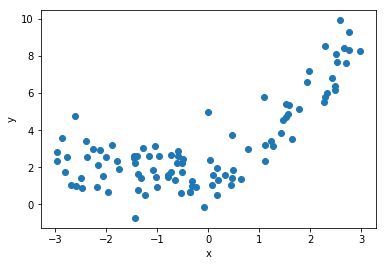

In [15]:
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

n = 100
np.random.seed(1412)
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_poly, y)
print(poly_reg.intercept_)
print(poly_reg.coef_)

[1.97836333]
[[0.99143834 0.46597934]]


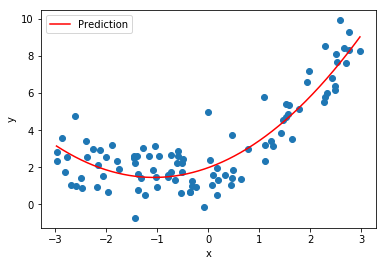

       2
0.466 x + 0.9914 x + 1.978


In [17]:
coef = list(poly_reg.coef_[0,:])[::-1]
coef.append(poly_reg.intercept_[0])
# 或使用np.polyfit来获取多项式系数，降幂排列，包括0次项(截距)
# coef = np.polyfit(X.ravel(), y.ravel(), deg=2)
f = np.poly1d(coef)
x_new = np.linspace(min(X), max(X), 1000)
y_new = f(x_new)
plt.scatter(X, y)
plt.plot(x_new, y_new, "r", label="Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print(np.poly1d(f))

##  学习曲线

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=14
    )
    train_errors = []
    test_errors = []
    for n in range(1, len(X_train)):
        model.fit(X_train[:n], y_train[:n])
        y_train_pred = model.predict(X_train[:n])
        y_test_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred, y_train[:n]))
        test_errors.append(mean_squared_error(y_test_pred, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="Validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

(0, 3)

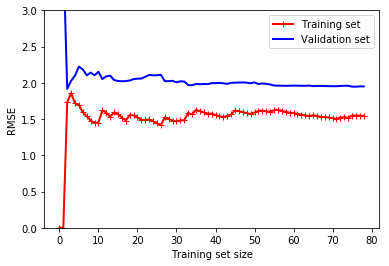

In [19]:
lm = linear_model.LinearRegression()
plot_learning_curve(lm, X, y)
plt.ylim([0, 3])

图3-3. 简单线性模型的学习曲线

In [20]:
from sklearn.pipeline import Pipeline

poly10_reg = Pipeline((
    ("polt_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("poly_", linear_model.LinearRegression())
))

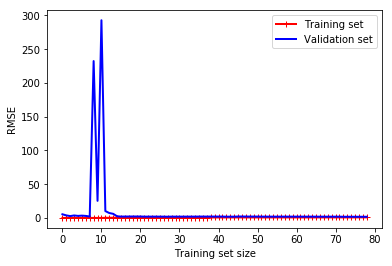

In [21]:
plot_learning_curve(poly10_reg, X, y)

图3-4

(0, 3)

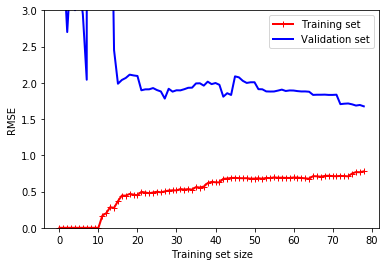

In [22]:
plot_learning_curve(poly10_reg, X, y)
plt.ylim([0, 3])

图3-5. 十次多项式的学习曲线，上面两图是一样的。

(0, 3)

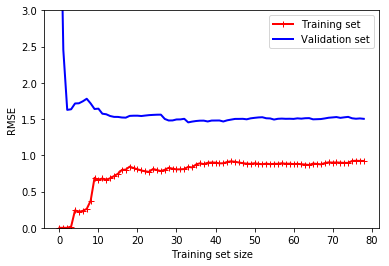

In [23]:
poly2_reg = Pipeline((
    ("polt_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("poly_", linear_model.LinearRegression())
))

plot_learning_curve(poly2_reg, X, y)
plt.ylim([0, 3])

图3-6. 二项式模型的学习曲线

如何判断一个模型的泛化能力呢(是过拟合，还是欠拟合)  
1. 可以使用交叉验证的方法，如果模型在训练集上表现好于交叉验证(交叉验证评价了测试误差)的结果，说明模型过拟合；如果模型在训练集和交叉验证上都表现很差，说明它欠拟合  
2. 使用学习曲线  
图3-3到3-6每一个模型都是使用相同的训练集和验证集，随着训练集样本数量的增加，RMSE从0开始增加，最后趋于稳定。  
a.3-6是二项式模型，是真实模型，它的训练误差在1左右，验证误差在1.5左右  
b.3-3是线性模型，虽然训练和验证误差接近(1.7和2.1)，但二者都略高于二项式模型，所以存在欠拟合的情况  
c.3-4、3-5是十次多项式模型，它的训练误差明显好于验证误差(0.8和1.8)，所以存在过拟合的情况  

个人认为，上述4副图中，结果的差异不是很明显(1和1.5，1.5和2的差距不是很大)，但是理论上模型的泛化好坏可以用上面的方法大致判断

### 偏差与方差的权衡  
ISLR p23

偏差指的是为了选择一个简单的模型逼近真实函数而被带入的误差。描述的是算法预测的平均值与真实值之间的关系(可理解为算法的拟合能力)  
方差代表的是用不同的训练集估计$f$时，估计函数的改变量。描述的是同一算法在不同数据集上的预测值与平均预测值之间的关系(可理解为算法的稳定性)

$E({y_0} - \hat{f}({x_0}))^2 \ =\ Var(\hat{f}({x_0})) + [Bias(\hat{f}({x_0}))]^2 + Var(\epsilon)$

其中

$Var(\hat{f}({x_0})) \ =\ E(\hat{f}({x_0})^2) + [E(\hat{f}({x_0})]^2$  
$[Bias(\hat{f}({x_0}))]^2 \ =\ [f({x_0}) - E(\hat{f}({x_0}))]^2$